<a href="https://colab.research.google.com/github/matthewbonadies/PrecisionPicksPGA/blob/main/Sprint_3_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="container" style="position:relative;">
<div style="float:left"><h1> Sprint 3 - Data Processing</h1></div>
<div style="position:relative; float:right">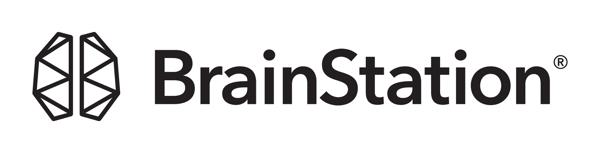
</div>
</div>


***

**Author:** Matt Bonadies  
**Date:** 4-15-2024  
**Version:** JupyterLab 3.6.3  

***

## Project Overview

#### **Introduction**  

The goal of this project is to create a machine learning model that takes historical data from the PGA (Professional Golf Association) Tour and predicts the scores any given player will shoot in their next tournament based on their past performance. While the predictions have a broad range of applications, our primary focus will be on their utility in the context of sports betting. This notebook pertains to the third sprint of my project. If you're interested in reviewing my Sprint 1 or 2 work, both the notebook and the presentation are available on my GitHub (https://github.com/matthewbonadies/BrainStation_Capstone). Before we proceed, let's take a moment to go over the basics underlying this project, including an understanding of golf, the PGA Tour, and sports betting.

#### **What is Golf?**  

Golf is a sport played on vast outdoor courses, each featuring 18 holes scattered across several thousand yards. Players aim to sink the ball in each hole using the minimum strokes possible. The game's simplicity in objective masks its strategic depth, requiring a wide range of shots from long drives to short, precise chips. Courses include Par 3's, Par 4's, and Par 5's, with the Par number indicating the expected number of strokes to complete the hole, from the starting point, or Tee Box, to the hole which is located on the putting green. The combination of these holes sets a standard course par, usually at 72 strokes, against which players' performances are measured.

#### **Youtube Videos for Further Explanation**

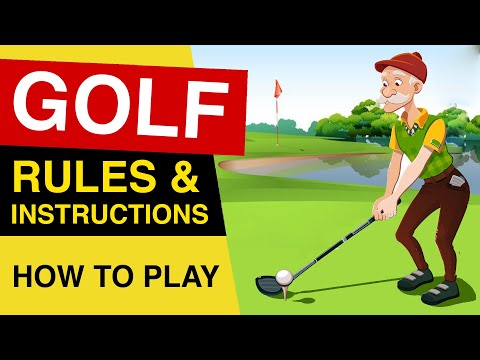

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('99nN7WWNF1Q')

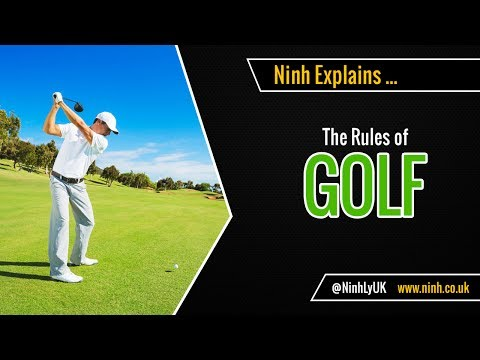

In [ ]:
YouTubeVideo('IcaFTHeVQ7w')

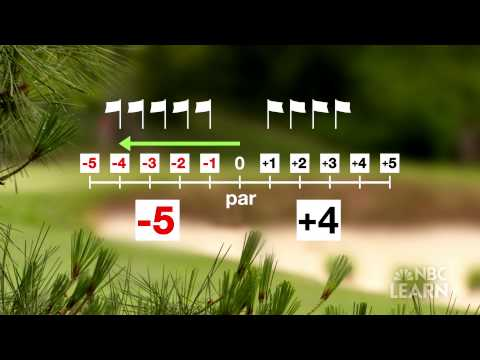

In [ ]:
YouTubeVideo('UO4Zri-H3AE')

#### **What is the PGA Tour?**  

At the pinnacle of this sport is the PGA Tour, where around 120 competitors partake in a four-day tournament, playing one round daily from Thursday to Sunday. The winner is the player with the lowest total strokes. Distinguished from many sports by its non-stop calendar, the PGA Tour introduces a new event every week in varied locations, continuously presenting fresh challenges and engaging spectators with its dynamic blend of competition and changing landscapes.

#### **What is Sports Betting?**

Sports betting is a form of gambling where individuals place wagers on the outcome of various sports events. Unlike many other forms of gambling that are purely chance-based, sports betting can involve a degree of skill and knowledge about the sports, teams, and athletes involved. Here’s a basic breakdown of how sports betting works:
  
- **Odds**: Odds represent the likelihood of an event happening. They determine how much a bettor can win if their bet is successful.
- **Types of Bets**: There are many types of bets that can be placed, ranging from simple bets on which team will win a game (Moneyline Bets) to more complex bets involving the margin of victory (Point Spread Bets) or the total points scored (Over/Under Bets).
- **How to Bet**: Bets can be placed through various channels, including online betting apps and traditional brick-and-mortar casinos.
  
Successful bettors research teams, analyze statistics, and follow sports news closely to make informed decisions. While there's always an element of luck involved, having a well-thought-out strategy can improve one's chances of winning.

#### **What is Golf Betting?**

Golf betting involves placing wagers on various outcomes related to golf tournaments. Unlike team sports, golf is an individual sport, which adds unique elements to betting. Here's an overview of the most common golf bets:
  
 - **Tournament Winner**: Betting on a player to win the tournament outright. It's straightforward but challenging due to the large field.
 - **Top 5, 10, 20 Finish**: Wagering on a player to finish in the top 5, 10, or 20. Offers lower odds than betting on the winner but is a bit easier to predict.
 - **Head-to-Head Matchups**: This involves betting on one player to outperform another specific player. The focus is on the overall performance rather than just the top positions. This method is most similar to betting in other sports, where you predict the outcome between two competing teams.

#### **Final Thoughts**

With the context of this project established, it's evident that developing a machine learning model to forecast a player's score **(Our Target Variable)** could be valuable. Such a model can guide bettors on the likely outcomes of various bets tied to a player's score, which, as mentioned earlier, are among the most frequent types of bets.

***

## Table of Contents

- **Imports**
- **Data Retrieval**
- **Data Dictionary**
- **Data Preparation**

***

## Imports

In [ ]:
# Imports all of the libraries that will be utilized throughout this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta
from io import StringIO
import requests

In [ ]:
# Imports all of the scikit-Learn libraries that will be utilized throughout this project
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import r2_score

In [ ]:
# Enables view of all columns when viewing Pandas DataFrames
pd.set_option('display.max_columns', None)

***

## Data Retrieval

We are going to retrieve four different data tables from the datagolf API:

1. Round Scoring, Stats & Strokes Gained
2. Player List & IDs
3. Field Updates
4. Player Rankings

At the start of our process, we separate the data into training and testing datasets due to the data's time-sensitive aspect. This separation is crucial to avoid data leakage during the feature engineering phase. Prior to our preprocessing and feature engineering efforts, we've included a data dictionary to offer a more detailed explanation of the data.

In [ ]:
# Private API Key utilized in the paramater variables below to extract data
api_key = '79f89dd4dffdddbddec2d92da0ca'

#### Round Scoring, Stats, & Strokes Gained - Training Dataset Retrieval

In [ ]:
# Retrieves Training Data
api_url = "https://feeds.datagolf.com/historical-raw-data/rounds"

df_list = []

for year in range (2017, 2023):
    params = {
        'tour': 'pga',
        'event_id': 'all',
        'year': year,
        'file_format': 'csv',
        'key': api_key
    }

    response = requests.get(api_url, params=params)

    if response.status_code == 200:
        # Use StringIO to convert the response content into a file-like object for read_csv
        data = StringIO(response.text)
        df = pd.read_csv(data)
        df_list.append(df)
        print(f"Data added for year: {year}")
    else:
        print("Failed to fetch data from the API. Status code:", response.status_code)

tn_df = pd.concat(df_list, ignore_index=True)
train_df = tn_df.copy()

print("Train Data Retrieved!")

Data added for year: 2017
Data added for year: 2018
Data added for year: 2019
Data added for year: 2020
Data added for year: 2021
Data added for year: 2022
Train Data Retrieved!


#### Round Scoring, Stats, & Strokes Gained - Testing Dataset Retrieval

In [ ]:
# Retrieves Testing Data
api_url = "https://feeds.datagolf.com/historical-raw-data/rounds"

df_list = []

for year in range (2023, 2025):
    params = {
        'tour': 'pga',
        'event_id': 'all',
        'year': year,
        'file_format': 'csv',
        'key': api_key
    }

    response = requests.get(api_url, params=params)

    if response.status_code == 200:
        # Use StringIO to convert the response content into a file-like object for read_csv
        data = StringIO(response.text)
        df = pd.read_csv(data)
        df_list.append(df)
        print(f"Data added for year: {year}")
    else:
        print("Failed to fetch data from the API. Status code:", response.status_code)

tt_df = pd.concat(df_list, ignore_index=True)
test_df = tt_df.copy()

print("Test Data Retrieved!")

Data added for year: 2023
Data added for year: 2024
Test Data Retrieved!


#### Player List & IDs Dataset Retrieval

In [ ]:
# Retrieves Player Information Data
api_url = "https://feeds.datagolf.com/get-player-list"

params = {
    'file_format': 'csv',
    'key': api_key
}

response = requests.get(api_url, params=params)

if response.status_code == 200:
    # Use StringIO to convert the response content into a file-like object for read_csv
    data = StringIO(response.text)
    player_df = pd.read_csv(data)
    print("Player Data Retrieved!")
else:
    print("Failed to fetch data from the API. Status code:", response.status_code)

Player Data Retrieved!


#### Field Updates Dataset Retrieval

In [ ]:
# Retrieves Player and Tournament Information Data for the Current Week
api_url = 'https://feeds.datagolf.com/field-updates'

params = {
    'tour': 'pga',
    'file_format': 'csv',
    'key': api_key
}

response = requests.get(api_url, params=params)

if response.status_code == 200:
    # Use StringIO to convert the response content into a file-like object for read_csv
    data = StringIO(response.text)
    field_df = pd.read_csv(data)
    print("Tournament Data Retrieved!")
else:
    print("Failed to fetch data from the API. Status code:", response.status_code)

Tournament Data Retrieved!


#### Player Rankings Dataset Retrieval

In [ ]:
# Retrieves Player Rankings Data
api_url = 'https://feeds.datagolf.com/preds/get-dg-rankings'

params = {
    'file_format': 'csv',
    'key': api_key
}

response = requests.get(api_url, params=params)

if response.status_code == 200:
    # Use StringIO to convert the response content into a file-like object for read_csv
    data = StringIO(response.text)
    rank_df = pd.read_csv(data)
    print("Player Rankings Data Retrieved!")
else:
    print("Failed to fetch data from the API. Status code:", response.status_code)

Player Rankings Data Retrieved!


#### Round Scoring, Stats, & Strokes Gained - Total Dataset Retrieval

In [ ]:
# Retrieves Total History Data
api_url = "https://feeds.datagolf.com/historical-raw-data/rounds"

df_list = []

for year in range (2017, 2025):
    params = {
        'tour': 'pga',
        'event_id': 'all',
        'year': year,
        'file_format': 'csv',
        'key': api_key
    }

    response = requests.get(api_url, params=params)

    if response.status_code == 200:
        # Use StringIO to convert the response content into a file-like object for read_csv
        data = StringIO(response.text)
        df = pd.read_csv(data)
        df_list.append(df)
        print(f"Data added for year: {year}")
    else:
        print("Failed to fetch data from the API. Status code:", response.status_code)

total_df = pd.concat(df_list, ignore_index=True)

print("Total History Data Retrieved!")

Data added for year: 2017
Data added for year: 2018
Data added for year: 2019
Data added for year: 2020
Data added for year: 2021
Data added for year: 2022
Data added for year: 2023
Data added for year: 2024
Total History Data Retrieved!


***

## Data Dictionary

#### **Round Scoring, Stats, & Strokes Gained**

| Column | Type | Description |
| --- | --- | --- |
|tour| object | Professional tour that the event was played on. |
|year| int64 | Calendar year. |
|season| int64 | Official season as defined by the PGA tour. |
|event_completed| datetime64[ns] | Official date of the final round of the tournament  |
|event_name| object | Name of tournament. |
|event_id| int64 | Unique Tournament ID number. |
|player_name| object | Name of player. |
|dg_id| int64 | Unique Player ID number. There is a single dg_id for each player. |
|round_num| int64 | Round number for the given tournament. Ranges from 1-4. |
|course_name| object | Name of golf course. |
|course_num| int64 | Unique Course ID number. |
|course_par| int64 | Course par - Scoring benchmark. Value is typically 72, but it can range from 70 to 72. |
|start_hole| int64 | Hole number that player started on. Value is either 1 or 10. |
|round_score| int64 | Score that was shot for the given round. Our model’s target variable. |
|sg_putt| float64 | Strokes gained putting.  |
|sg_arg| float64 | Strokes gained around the green.  |
|sg_app| float64 | Strokes gained approaching the green. |
|sg_ott| float64 | Strokes gained off the tee. |
|sg_t2g| float64 | Strokes gained from tee to green. The sum of sg_ott, sg_app, and sg_arg. |
|sg_total| float64 | Strokes gained total. Difference between the player’s score and the average score. |
|driving_dist| float64 | Average distance of every drive hit. |
|driving_acc| float64 | Fairways in regulation. Percentage of fairways. |
|gir| float64 | Greens in regulation. Percentage of greens hit. |
|scrambling| float64 | Percentage of shots  ≤ 50 yards that were holed out in 2 strokes or less. |
|prox_rgh| float64 | Average proximity of all shots hit from locations other than the fairway. |
|prox_fw| float64 | Average proximity of all shots hit from the fairway. |
|great_shots| float64 | Sum of shots that fall into the top 5% of strokes-gained values in each category. |
|poor_shots| float64 | Sum of shots that fall into the bottom 5% of strokes-gained values in each category. |
|fin_num| int64 | Official finishing position. |
|teetime_numeric| float64 | Time a player tee’d off. |
|round_completed| datetime64[ns] | Date the round was played. |
|month| int32 | Month the round was played. |
|day| int32 | Day of month the round was played. |
|ohe_win| int64 | Binary value if the player won or not. |
|ohe_top_five| int64 | Binary value if the player finished in the top 5 or not. |
|ohe_top_ten| int64 | Binary value if the player finished in the top 10 or not. |
|ohe_top_twenty| int64 | Binary value if the player finished in the top 20 or not. |
|ohe_make_cut| int64 | Binary value if the player made the cut after 2 rounds or not. |
|career_moving_avg_sg_putt| float64 | Average strokes gained putting for entire timeframe of dataset.|
|career_moving_med_sg_putt| float64 | Median strokes gained putting for entire timeframe of dataset.|
|L44_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 44 rounds. |
|L44_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 44 rounds. |
|L36_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 36 rounds. |
|L36_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 36 rounds. |
|L28_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 28 rounds. |
|L28_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 28 rounds. |
|L24_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 24 rounds. |
|L24_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 24 rounds. |
|L20_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 20 rounds. |
|L20_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 20 rounds. |
|L16_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 16 rounds. |
|L16_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 16 rounds. |
|L12_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 12 rounds. |
|L12_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 12 rounds. |
|L8_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 8 rounds. |
|L8_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 8 rounds. |
|L4_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 4 rounds. |
|L4_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 4 rounds. |
|L3_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 3 rounds. |
|L3_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 3 rounds. |
|L2_moving_avg_sg_putt| float64 | Average strokes gained putting from the last 2 rounds. |
|L2_sg_putt_std_dev| float64 | Standard deviation of strokes gained putting from the last 2 rounds. |
|L45_moving_med_sg_putt| float64 | Median strokes gained putting from last 45 rounds. |
|L37_moving_med_sg_putt| float64 | Median strokes gained putting from last 37 rounds. |
|L29_moving_med_sg_putt| float64 | Median strokes gained putting from last 29 rounds. |
|L21_moving_med_sg_putt| float64 | Median strokes gained putting from last 21 rounds. |
|L15_moving_med_sg_putt| float64 | Median strokes gained putting from last 15 rounds. |
|L11_moving_med_sg_putt| float64 | Median strokes gained putting from last 11 rounds. |
|L9_moving_med_sg_putt| float64 | Median strokes gained putting from last 9 rounds. |
|L7_moving_med_sg_putt| float64 | Median strokes gained putting from last 7 rounds. |
|L5_moving_med_sg_putt| float64 | Median strokes gained putting from last 5 rounds. |
|L3_moving_med_sg_putt| float64 | Median strokes gained putting from last 3 rounds. |
|career_moving_avg_sg_arg| float64 | Average strokes gained around the green for entire timeframe of dataset.|
|career_moving_med_sg_arg| float64 | Median strokes gained around the green for entire timeframe of dataset.|
|L44_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 44 rounds. |
|L44_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 44 rounds. |
|L36_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 36 rounds. |
|L36_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 36 rounds. |
|L28_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 28 rounds. |
|L28_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 28 rounds. |
|L24_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 24 rounds. |
|L24_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 24 rounds. |
|L20_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 20 rounds. |
|L20_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 20 rounds. |
|L16_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 16 rounds. |
|L16_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 16 rounds. |
|L12_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 12 rounds. |
|L12_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 12 rounds. |
|L8_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 8 rounds. |
|L8_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 8 rounds. |
|L4_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 4 rounds. |
|L4_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 4 rounds. |
|L3_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 3 rounds. |
|L3_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 3 rounds. |
|L2_moving_avg_sg_arg| float64 | Average strokes gained around the green from the last 2 rounds. |
|L2_sg_arg_std_dev| float64 | Standard deviation of strokes gained around the green from the last 2 rounds. |
|L45_moving_med_sg_arg| float64 | Median strokes gained around the green from last 45 rounds. |
|L37_moving_med_sg_arg| float64 | Median strokes gained around the green from last 37 rounds. |
|L29_moving_med_sg_arg| float64 | Median strokes gained around the green from last 29 rounds. |
|L21_moving_med_sg_arg| float64 | Median strokes gained around the green from last 21 rounds. |
|L15_moving_med_sg_arg| float64 | Median strokes gained around the green from last 15 rounds. |
|L11_moving_med_sg_arg| float64 | Median strokes gained around the green from last 11 rounds. |
|L9_moving_med_sg_arg| float64 | Median strokes gained around the green from last 9 rounds. |
|L7_moving_med_sg_arg| float64 | Median strokes gained around the green from last 7 rounds. |
|L5_moving_med_sg_arg| float64 | Median strokes gained around the green from last 5 rounds. |
|L3_moving_med_sg_arg| float64 | Median strokes gained around the green from last 3 rounds. |
|career_moving_avg_sg_app| float64 | Average strokes gained approaching the green for entire timeframe of dataset.|
|career_moving_med_sg_app| float64 | Median strokes gained approaching the green for entire timeframe of dataset.|
|L44_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 44 rounds. |
|L44_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 44 rounds. |
|L36_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 36 rounds. |
|L36_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 36 rounds. |
|L28_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 28 rounds. |
|L28_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 28 rounds. |
|L24_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 24 rounds. |
|L24_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 24 rounds. |
|L20_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 20 rounds. |
|L20_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 20 rounds. |
|L16_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 16 rounds. |
|L16_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 16 rounds. |
|L12_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 12 rounds. |
|L12_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 12 rounds. |
|L8_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 8 rounds. |
|L8_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 8 rounds. |
|L4_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 4 rounds. |
|L4_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 4 rounds. |
|L3_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 3 rounds. |
|L3_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 3 rounds. |
|L2_moving_avg_sg_app| float64 | Average strokes gained approaching the green from the last 2 rounds. |
|L2_sg_app_std_dev| float64 | Standard deviation of strokes gained approaching the green from the last 2 rounds. |
|L45_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 45 rounds. |
|L37_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 37 rounds. |
|L29_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 29 rounds. |
|L21_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 21 rounds. |
|L15_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 15 rounds. |
|L11_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 11 rounds. |
|L9_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 9 rounds. |
|L7_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 7 rounds. |
|L5_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 5 rounds. |
|L3_moving_med_sg_app| float64 | Median strokes gained approaching the green from last 3 rounds. |
|career_moving_avg_sg_ott| float64 | Average strokes gained off the tee for entire timeframe of dataset.|
|career_moving_med_sg_ott| float64 | Median strokes gained off the tee for entire timeframe of dataset.|
|L44_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 44 rounds. |
|L44_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 44 rounds. |
|L36_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 36 rounds. |
|L36_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 36 rounds. |
|L28_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 28 rounds. |
|L28_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 28 rounds. |
|L24_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 24 rounds. |
|L24_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 24 rounds. |
|L20_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 20 rounds. |
|L20_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 20 rounds. |
|L16_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 16 rounds. |
|L16_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 16 rounds. |
|L12_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 12 rounds. |
|L12_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 12 rounds. |
|L8_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 8 rounds. |
|L8_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 8 rounds. |
|L4_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 4 rounds. |
|L4_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 4 rounds. |
|L3_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 3 rounds. |
|L3_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 3 rounds. |
|L2_moving_avg_sg_ott| float64 | Average strokes gained off the tee from the last 2 rounds. |
|L2_sg_ott_std_dev| float64 | Standard deviation of strokes gained off the tee from the last 2 rounds. |
|L45_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 45 rounds. |
|L37_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 37 rounds. |
|L29_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 29 rounds. |
|L21_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 21 rounds. |
|L15_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 15 rounds. |
|L11_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 11 rounds. |
|L9_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 9 rounds. |
|L7_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 7 rounds. |
|L5_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 5 rounds. |
|L3_moving_med_sg_ott| float64 | Median strokes gained off the tee from last 3 rounds. |
|career_moving_avg_sg_t2g| float64 | Average strokes gained tee to green for entire timeframe of dataset.|
|career_moving_med_sg_t2g| float64 | Median strokes gained tee to green for entire timeframe of dataset.|
|L44_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 44 rounds. |
|L44_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 44 rounds. |
|L36_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 36 rounds. |
|L36_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 36 rounds. |
|L28_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 28 rounds. |
|L28_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 28 rounds. |
|L24_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 24 rounds. |
|L24_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 24 rounds. |
|L20_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 20 rounds. |
|L20_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 20 rounds. |
|L16_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 16 rounds. |
|L16_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 16 rounds. |
|L12_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 12 rounds. |
|L12_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 12 rounds. |
|L8_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 8 rounds. |
|L8_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 8 rounds. |
|L4_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 4 rounds. |
|L4_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 4 rounds. |
|L3_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 3 rounds. |
|L3_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 3 rounds. |
|L2_moving_avg_sg_t2g| float64 | Average strokes gained tee to green from the last 2 rounds. |
|L2_sg_t2g_std_dev| float64 | Standard deviation of strokes gained tee to green from the last 2 rounds. |
|L45_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 45 rounds. |
|L37_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 37 rounds. |
|L29_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 29 rounds. |
|L21_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 21 rounds. |
|L15_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 15 rounds. |
|L11_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 11 rounds. |
|L9_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 9 rounds. |
|L7_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 7 rounds. |
|L5_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 5 rounds. |
|L3_moving_med_sg_t2g| float64 | Median strokes gained tee to green from last 3 rounds. |
|career_moving_avg_sg_total| float64 | Average strokes gained total for entire timeframe of dataset.|
|career_moving_med_sg_total| float64 | Median strokes gained total for entire timeframe of dataset.|
|L44_moving_avg_sg_total| float64 | Average strokes gained total from the last 44 rounds. |
|L44_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 44 rounds. |
|L36_moving_avg_sg_total| float64 | Average strokes gained total from the last 36 rounds. |
|L36_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 36 rounds. |
|L28_moving_avg_sg_total| float64 | Average strokes gained total from the last 28 rounds. |
|L28_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 28 rounds. |
|L24_moving_avg_sg_total| float64 | Average strokes gained total from the last 24 rounds. |
|L24_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 24 rounds. |
|L20_moving_avg_sg_total| float64 | Average strokes gained total from the last 20 rounds. |
|L20_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 20 rounds. |
|L16_moving_avg_sg_total| float64 | Average strokes gained total from the last 16 rounds. |
|L16_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 16 rounds. |
|L12_moving_avg_sg_total| float64 | Average strokes gained total from the last 12 rounds. |
|L12_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 12 rounds. |
|L8_moving_avg_sg_total| float64 | Average strokes gained total from the last 8 rounds. |
|L8_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 8 rounds. |
|L4_moving_avg_sg_total| float64 | Average strokes gained total from the last 4 rounds. |
|L4_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 4 rounds. |
|L3_moving_avg_sg_total| float64 | Average strokes gained total from the last 3 rounds. |
|L3_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 3 rounds. |
|L2_moving_avg_sg_total| float64 | Average strokes gained total from the last 2 rounds. |
|L2_sg_total_std_dev| float64 | Standard deviation of strokes gained total from the last 2 rounds. |
|L45_moving_med_sg_total| float64 | Median strokes gained total from last 45 rounds. |
|L37_moving_med_sg_total| float64 | Median strokes gained total from last 37 rounds. |
|L29_moving_med_sg_total| float64 | Median strokes gained total from last 29 rounds. |
|L21_moving_med_sg_total| float64 | Median strokes gained total from last 21 rounds. |
|L15_moving_med_sg_total| float64 | Median strokes gained total from last 15 rounds. |
|L11_moving_med_sg_total| float64 | Median strokes gained total from last 11 rounds. |
|L9_moving_med_sg_total| float64 | Median strokes gained total from last 9 rounds. |
|L7_moving_med_sg_total| float64 | Median strokes gained total from last 7 rounds. |
|L5_moving_med_sg_total| float64 | Median strokes gained total from last 5 rounds. |
|L3_moving_med_sg_total| float64 | Median strokes gained total from last 3 rounds. |
|career_moving_avg_driving_dist| float64 | Average driving distance for entire timeframe of dataset.|
|career_moving_med_driving_dist| float64 | Median driving distance for entire timeframe of dataset.|
|L44_moving_avg_driving_dist| float64 | Average driving distance from the last 44 rounds. |
|L44_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 44 rounds. |
|L36_moving_avg_driving_dist| float64 | Average driving distance from the last 36 rounds. |
|L36_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 36 rounds. |
|L28_moving_avg_driving_dist| float64 | Average driving distance from the last 28 rounds. |
|L28_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 28 rounds. |
|L24_moving_avg_driving_dist| float64 | Average driving distance from the last 24 rounds. |
|L24_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 24 rounds. |
|L20_moving_avg_driving_dist| float64 | Average driving distance from the last 20 rounds. |
|L20_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 20 rounds. |
|L16_moving_avg_driving_dist| float64 | Average driving distance from the last 16 rounds. |
|L16_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 16 rounds. |
|L12_moving_avg_driving_dist| float64 | Average driving distance from the last 12 rounds. |
|L12_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 12 rounds. |
|L8_moving_avg_driving_dist| float64 | Average driving distance from the last 8 rounds. |
|L8_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 8 rounds. |
|L4_moving_avg_driving_dist| float64 | Average driving distance from the last 4 rounds. |
|L4_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 4 rounds. |
|L3_moving_avg_driving_dist| float64 | Average driving distance from the last 3 rounds. |
|L3_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 3 rounds. |
|L2_moving_avg_driving_dist| float64 | Average driving distance from the last 2 rounds. |
|L2_driving_dist_std_dev| float64 | Standard deviation of driving distance from the last 2 rounds. |
|L45_moving_med_driving_dist| float64 | Median driving distance from last 45 rounds. |
|L37_moving_med_driving_dist| float64 | Median driving distance from last 37 rounds. |
|L29_moving_med_driving_dist| float64 | Median driving distance from last 29 rounds. |
|L21_moving_med_driving_dist| float64 | Median driving distance from last 21 rounds. |
|L15_moving_med_driving_dist| float64 | Median driving distance from last 15 rounds. |
|L11_moving_med_driving_dist| float64 | Median driving distance from last 11 rounds. |
|L9_moving_med_driving_dist| float64 | Median driving distance from last 9 rounds. |
|L7_moving_med_driving_dist| float64 | Median driving distance from last 7 rounds. |
|L5_moving_med_driving_dist| float64 | Median driving distance from last 5 rounds. |
|L3_moving_med_driving_dist| float64 | Median driving distance from last 3 rounds. |
|career_moving_avg_driving_acc| float64 | Average driving accuracy for entire timeframe of dataset.|
|career_moving_med_driving_acc| float64 | Median driving accuracy for entire timeframe of dataset.|
|L44_moving_avg_driving_acc| float64 | Average driving accuracy from the last 44 rounds. |
|L44_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 44 rounds. |
|L36_moving_avg_driving_acc| float64 | Average driving accuracy from the last 36 rounds. |
|L36_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 36 rounds. |
|L28_moving_avg_driving_acc| float64 | Average driving accuracy from the last 28 rounds. |
|L28_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 28 rounds. |
|L24_moving_avg_driving_acc| float64 | Average driving accuracy from the last 24 rounds. |
|L24_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 24 rounds. |
|L20_moving_avg_driving_acc| float64 | Average driving accuracy from the last 20 rounds. |
|L20_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 20 rounds. |
|L16_moving_avg_driving_acc| float64 | Average driving accuracy from the last 16 rounds. |
|L16_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 16 rounds. |
|L12_moving_avg_driving_acc| float64 | Average driving accuracy from the last 12 rounds. |
|L12_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 12 rounds. |
|L8_moving_avg_driving_acc| float64 | Average driving accuracy from the last 8 rounds. |
|L8_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 8 rounds. |
|L4_moving_avg_driving_acc| float64 | Average driving accuracy from the last 4 rounds. |
|L4_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 4 rounds. |
|L3_moving_avg_driving_acc| float64 | Average driving accuracy from the last 3 rounds. |
|L3_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 3 rounds. |
|L2_moving_avg_driving_acc| float64 | Average driving accuracy from the last 2 rounds. |
|L2_driving_acc_std_dev| float64 | Standard deviation of driving accuracy from the last 2 rounds. |
|L45_moving_med_driving_acc| float64 | Median driving accuracy from last 45 rounds. |
|L37_moving_med_driving_acc| float64 | Median driving accuracy from last 37 rounds. |
|L29_moving_med_driving_acc| float64 | Median driving accuracy from last 29 rounds. |
|L21_moving_med_driving_acc| float64 | Median driving accuracy from last 21 rounds. |
|L15_moving_med_driving_acc| float64 | Median driving accuracy from last 15 rounds. |
|L11_moving_med_driving_acc| float64 | Median driving accuracy from last 11 rounds. |
|L9_moving_med_driving_acc| float64 | Median driving accuracy from last 9 rounds. |
|L7_moving_med_driving_acc| float64 | Median driving accuracy from last 7 rounds. |
|L5_moving_med_driving_acc| float64 | Median driving accuracy from last 5 rounds. |
|L3_moving_med_driving_acc| float64 | Median driving accuracy from last 3 rounds. |
|career_moving_avg_gir| float64 | Average GIR for entire timeframe of dataset.|
|career_moving_med_gir| float64 | Median GIR for entire timeframe of dataset.|
|L44_moving_avg_gir| float64 | Average GIR from the last 44 rounds. |
|L44_gir_std_dev| float64 | Standard deviation of GIR from the last 44 rounds. |
|L36_moving_avg_gir| float64 | Average GIR from the last 36 rounds. |
|L36_gir_std_dev| float64 | Standard deviation of GIR from the last 36 rounds. |
|L28_moving_avg_gir| float64 | Average GIR from the last 28 rounds. |
|L28_gir_std_dev| float64 | Standard deviation of GIR from the last 28 rounds. |
|L24_moving_avg_gir| float64 | Average GIR from the last 24 rounds. |
|L24_gir_std_dev| float64 | Standard deviation of GIR from the last 24 rounds. |
|L20_moving_avg_gir| float64 | Average GIR from the last 20 rounds. |
|L20_gir_std_dev| float64 | Standard deviation of GIR from the last 20 rounds. |
|L16_moving_avg_gir| float64 | Average GIR from the last 16 rounds. |
|L16_gir_std_dev| float64 | Standard deviation of GIR from the last 16 rounds. |
|L12_moving_avg_gir| float64 | Average GIR from the last 12 rounds. |
|L12_gir_std_dev| float64 | Standard deviation of GIR from the last 12 rounds. |
|L8_moving_avg_gir| float64 | Average GIR from the last 8 rounds. |
|L8_gir_std_dev| float64 | Standard deviation of GIR from the last 8 rounds. |
|L4_moving_avg_gir| float64 | Average GIR from the last 4 rounds. |
|L4_gir_std_dev| float64 | Standard deviation of GIR from the last 4 rounds. |
|L3_moving_avg_gir| float64 | Average GIR from the last 3 rounds. |
|L3_gir_std_dev| float64 | Standard deviation of GIR from the last 3 rounds. |
|L2_moving_avg_gir| float64 | Average GIR from the last 2 rounds. |
|L2_gir_std_dev| float64 | Standard deviation of GIR from the last 2 rounds. |
|L45_moving_med_gir| float64 | Median GIR from last 45 rounds. |
|L37_moving_med_gir| float64 | Median GIR from last 37 rounds. |
|L29_moving_med_gir| float64 | Median GIR from last 29 rounds. |
|L21_moving_med_gir| float64 | Median GIR from last 21 rounds. |
|L15_moving_med_gir| float64 | Median GIR from last 15 rounds. |
|L11_moving_med_gir| float64 | Median GIR from last 11 rounds. |
|L9_moving_med_gir| float64 | Median GIR from last 9 rounds. |
|L7_moving_med_gir| float64 | Median GIR from last 7 rounds. |
|L5_moving_med_gir| float64 | Median GIR from last 5 rounds. |
|L3_moving_med_gir| float64 | Median GIR from last 3 rounds. |
|career_moving_avg_scrambling| float64 | Average scrambling for entire timeframe of dataset.|
|career_moving_med_scrambling| float64 | Median scrambling for entire timeframe of dataset.|
|L44_moving_avg_scrambling| float64 | Average scrambling from the last 44 rounds. |
|L44_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 44 rounds. |
|L36_moving_avg_scrambling| float64 | Average scrambling from the last 36 rounds. |
|L36_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 36 rounds. |
|L28_moving_avg_scrambling| float64 | Average scrambling from the last 28 rounds. |
|L28_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 28 rounds. |
|L24_moving_avg_scrambling| float64 | Average scrambling from the last 24 rounds. |
|L24_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 24 rounds. |
|L20_moving_avg_scrambling| float64 | Average scrambling from the last 20 rounds. |
|L20_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 20 rounds. |
|L16_moving_avg_scrambling| float64 | Average scrambling from the last 16 rounds. |
|L16_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 16 rounds. |
|L12_moving_avg_scrambling| float64 | Average scrambling from the last 12 rounds. |
|L12_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 12 rounds. |
|L8_moving_avg_scrambling| float64 | Average scrambling from the last 8 rounds. |
|L8_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 8 rounds. |
|L4_moving_avg_scrambling| float64 | Average scrambling from the last 4 rounds. |
|L4_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 4 rounds. |
|L3_moving_avg_scrambling| float64 | Average scrambling from the last 3 rounds. |
|L3_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 3 rounds. |
|L2_moving_avg_scrambling| float64 | Average scrambling from the last 2 rounds. |
|L2_scrambling_std_dev| float64 | Standard deviation of scrambling from the last 2 rounds. |
|L45_moving_med_scrambling| float64 | Median scrambling from last 45 rounds. |
|L37_moving_med_scrambling| float64 | Median scrambling from last 37 rounds. |
|L29_moving_med_scrambling| float64 | Median scrambling from last 29 rounds. |
|L21_moving_med_scrambling| float64 | Median scrambling from last 21 rounds. |
|L15_moving_med_scrambling| float64 | Median scrambling from last 15 rounds. |
|L11_moving_med_scrambling| float64 | Median scrambling from last 11 rounds. |
|L9_moving_med_scrambling| float64 | Median scrambling from last 9 rounds. |
|L7_moving_med_scrambling| float64 | Median scrambling from last 7 rounds. |
|L5_moving_med_scrambling| float64 | Median scrambling from last 5 rounds. |
|L3_moving_med_scrambling| float64 | Median scrambling from last 3 rounds. |
|career_moving_avg_round_score| float64 | Average round score for entire timeframe of dataset.|
|career_moving_med_round_score| float64 | Median round score for entire timeframe of dataset.|
|L44_moving_avg_round_score| float64 | Average round score from the last 44 rounds. |
|L44_round_score_std_dev| float64 | Standard deviation of round score from the last 44 rounds. |
|L44_moving_min_round_score| float64 | Minimum round score from the last 44 rounds. |
|L44_moving_max_round_score| float64 | Maximum round score from the last 44 rounds. |
|L36_moving_avg_round_score| float64 | Average round score from the last 36 rounds. |
|L36_round_score_std_dev| float64 | Standard deviation of round score from the last 36 rounds. |
|L36_moving_min_round_score| float64 | Minimum round score from the last 36 rounds. |
|L36_moving_max_round_score| float64 | Maximum round score from the last 36 rounds. |
|L28_moving_avg_round_score| float64 | Average round score from the last 28 rounds. |
|L28_round_score_std_dev| float64 | Standard deviation of round score from the last 28 rounds. |
|L28_moving_min_round_score| float64 | Minimum round score from the last 28 rounds. |
|L28_moving_max_round_score| float64 | Maximum round score from the last 28 rounds. |
|L24_moving_avg_round_score| float64 | Average round score from the last 24 rounds. |
|L24_round_score_std_dev| float64 | Standard deviation of round score from the last 24 rounds. |
|L24_moving_min_round_score| float64 | Minimum round score from the last 24 rounds. |
|L24_moving_max_round_score| float64 | Maximum round score from the last 24 rounds. |
|L20_moving_avg_round_score| float64 | Average round score from the last 20 rounds. |
|L20_round_score_std_dev| float64 | Standard deviation of round score from the last 20 rounds. |
|L20_moving_min_round_score| float64 | Minimum round score from the last 20 rounds. |
|L20_moving_max_round_score| float64 | Maximum round score from the last 20 rounds. |
|L16_moving_avg_round_score| float64 | Average round score from the last 16 rounds. |
|L16_round_score_std_dev| float64 | Standard deviation of round score from the last 16 rounds. |
|L16_moving_min_round_score| float64 | Minimum round score from the last 16 rounds. |
|L16_moving_max_round_score| float64 | Maximum round score from the last 16 rounds. |
|L12_moving_avg_round_score| float64 | Average round score from the last 12 rounds. |
|L12_round_score_std_dev| float64 | Standard deviation of round score from the last 12 rounds. |
|L12_moving_min_round_score| float64 | Minimum round score from the last 12 rounds. |
|L12_moving_max_round_score| float64 | Maximum round score from the last 12 rounds. |
|L8_moving_avg_round_score| float64 | Average round score from the last 8 rounds. |
|L8_round_score_std_dev| float64 | Standard deviation of round score from the last 8 rounds. |
|L8_moving_min_round_score| float64 | Minimum round score from the last 8 rounds. |
|L8_moving_max_round_score| float64 | Maximum round score from the last 8 rounds. |
|L4_moving_avg_round_score| float64 | Average round score from the last 4 rounds. |
|L4_round_score_std_dev| float64 | Standard deviation of round score from the last 4 rounds. |
|L4_moving_min_round_score| float64 | Minimum round score from the last 4 rounds. |
|L4_moving_max_round_score| float64 | Maximum round score from the last 4 rounds. |
|L3_moving_avg_round_score| float64 | Average round score from the last 3 rounds. |
|L3_round_score_std_dev| float64 | Standard deviation of round score from the last 3 rounds. |
|L3_moving_min_round_score| float64 | Minimum round score from the last 3 rounds. |
|L3_moving_max_round_score| float64 | Maximum round score from the last 3 rounds. |
|L2_moving_avg_round_score| float64 | Average round score from the last 2 rounds. |
|L2_round_score_std_dev| float64 | Standard deviation of round score from the last 2 rounds. |
|L2_moving_min_round_score| float64 | Minimum round score from the last 2 rounds. |
|L2_moving_max_round_score| float64 | Maximum round score from the last 2 rounds. |
|L45_moving_med_round_score| float64 | Median round score from last 45 rounds. |
|L37_moving_med_round_score| float64 | Median round score from last 37 rounds. |
|L29_moving_med_round_score| float64 | Median round score from last 29 rounds. |
|L21_moving_med_round_score| float64 | Median round score from last 21 rounds. |
|L15_moving_med_round_score| float64 | Median round score from last 15 rounds. |
|L11_moving_med_round_score| float64 | Median round score from last 11 rounds. |
|L9_moving_med_round_score| float64 | Median round score from last 9 rounds. |
|L7_moving_med_round_score| float64 | Median round score from last 7 rounds. |
|L5_moving_med_round_score| float64 | Median round score from last 5 rounds. |
|L3_moving_med_round_score| float64 | Median round score from last 3 rounds. |
|career_min_round_score| float64 | Average round score for entire timeframe of dataset.|
|career_max_round_score| float64 | Median round score for entire timeframe of dataset.|
|Days_Since| int64 | Number of days between now and when the round was completed. |
|Last_365_Days| int64 | Binary column if round was played in the last 365 days or not. |
|Last_180_Days| int64 | Binary column if round was played in the last 180 days or not. |
|Last_90_Days| int64 | Binary column if round was played in the last 90 days or not. |
|Last_60_Days| int64 | Binary column if round was played in the last 60 days or not. |
|Last_30_Days| int64 | Binary column if round was played in the last 30 days or not. |
|Last_10_Days| int64 | Binary column if round was played in the last 10 days or not. |
|Last_5_Days| int64 | Binary column if round was played in the last 5 days or not. |
|lagged_year| float64 | Previous round year. |
|lagged_season| float64 | Previous round season. |
|lagged_event_id| float64 | Previous round event id. |
|lagged_round_num| float64 | Previous round number. |
|lagged_course_num| float64 | Previous round course number. |
|lagged_course_par| float64 | Previous round course par. |
|lagged_start_hole| float64 | Previous round start hole. |
|lagged_round_score| float64 | Previous round score. |
|lagged_sg_putt| float64 | Previous round strokes gained putting. |
|lagged_sg_arg| float64 | Previous round strokes gained around the green. |
|lagged_sg_app| float64 | Previous round strokes gained approaching the green. |
|lagged_sg_ott| float64 | Previous round strokes gained off the tee. |
|lagged_sg_t2g| float64 | Previous round strokes gained tee to green. |
|lagged_sg_total| float64 | Previous round strokes gained total. |
|lagged_driving_dist| float64 | Previous round average driving distance. |
|lagged_driving_acc| float64 | Previous round driving accuracy. |
|lagged_gir| float64 | Previous round greens in regulation. |
|lagged_scrambling| float64 | Previous round scrambling. |
|lagged_prox_rgh| float64 | Previous round average proximity of all shots hit from locations other than the fairway. |
|lagged_prox_fw| float64 | Previous round average proximity of all shots hit from the fairway. |
|lagged_great_shots| float64 | Previous round sum of great shots. |
|lagged_poor_shots| float64 | Previous round sum of poor shots. |
|lagged_month| float64 | Previous round month. |
|lagged_day| float64 | Previous round day of month. |
|lagged_fin_num| float64 | Previous round finishing position. |
|lagged_teetime_numeric| float64 | Previous round tee time. |
|lagged_ohe_win| float64 | Previous round binary value if the player won or not. |
|lagged_ohe_top_five| float64 | Previous round binary value if the player finished in the top 5 or not. |
|lagged_ohe_top_ten| float64 | Previous round binary value if the player finished in the top 10 or not. |
|lagged_ohe_top_twenty| float64 | Previous round binary value if the player finished in the top 20 or not. |
|lagged_ohe_make_cut| float64 | Previous round binary value if the player made the cut after 2 rounds or not. |![image.png](attachment:e12d1821-e4cb-41ec-882e-34813d093e80.png)![image.png](attachment:acc9d618-92d1-4a22-a185-2a1f7fdde99f.png)![image.png](attachment:af33dbf7-76da-444b-9bd3-e9788ea8227a.png)![image.png](attachment:5ca5905d-d4fe-4506-8658-5985c9cfea25.png)

#### **Player List & IDs**

| Column | Type | Description |
| --- | --- | --- |
| player_name | object | Name of player. |
| dg_id | int64 | Unique Player ID number. There is a single dg_id for each player. |
| country | object | Country of player. |
| country_code | int64 | Numeric Country ID of player. |
| amateur | int64 | Binary column of whether a player is an amateur or not (Meaning they’re a professional if value is 0). |

#### **Field Updates**

| Column | Type | Description |
| --- | --- | --- |
| event_name | object | Name of tournament. |
| current_round | int64 | Upcoming round number. |
| course | float64 | Name of course. |
| player_name | object | Name of player. |
| dg_id | int64 | Unique Player ID number. There is a single dg_id for each player. |
| country | object | Country of player. |
| start_hole | int64 | Hole number that player started on. Value is either 1 or 10. |
| r1_teetime | float64 | Tee time of first round. |
| r2_teetime | float64 | Tee time of second round. |
| r3_teetime | float64 | Tee time of third round. |
| r4_teetime | float64 | Tee time of fourth round. |
| last_updated | object | Last time the table was refreshed. |
| early_late | int64 | Not pertinent for this project. |
| am | int64 | Not pertinent for this project. |
| flag | object | Not pertinent for this project. |
| pga_number | int64 | Not pertinent for this project. |
| yh_salary | int64 | Not pertinent for this project. |
| dk_salary | int64 | Not pertinent for this project. |
| fd_id | object | Not pertinent for this project. |
| fd_salary | int64 | Not pertinent for this project. |
| dk_id | int64 | Not pertinent for this project. |
| yh_id | object | Not pertinent for this project. |
| unofficial | int64 | Not pertinent for this project. |

#### **Player Rankings**

| Column | Type | Description |
| --- | --- | --- |
| player_name | object | Name of player. |
| country | object | Country of player. |
| owgr_rank | int64 | World rank number of player. |

####

***

In [ ]:
def initial_preprocessing(df):
    """

    Converts 'event_completed' to datetime, extracts numerical version of 'fin_text' column, converts 'teetime' into decimal form,
    computes a 'round_completed' column, and extracts individual month and day number from the newly created 'round_completed' column.

    """
    df = df.dropna(axis=0)

    # Converts date from object to datetime
    df.loc[:, 'event_completed'] = df['event_completed'].astype('datetime64[ns]')
    df = df.copy()

    # Extracts the numerical portion of the finishing position information
    df['fin_num'] = df['fin_text'].str.extract('(\d+)')
    df.loc[df['fin_num'].isna(), 'fin_num'] = '0'
    df['fin_num'] = df['fin_num'].astype(int)
    df = df.drop(['fin_text'], axis=1)
    df = df.copy()

    # Converts times into a time format and then into a float, making the data compatible for input into our model
    df['teetime_cleaned'] = pd.to_datetime(df['teetime'], format='%I:%M%p').dt.time
    df['teetime_numeric'] = df['teetime_cleaned'].apply(lambda x: x.hour + x.minute / 60)
    df = df.drop(['teetime','teetime_cleaned'], axis=1)
    df = df.copy()

    # Computates the 'round completed' feature based off of the event completion date and round number
    def calculate_round_date(row):
        if row['round_num'] == 1:
            return row['event_completed'] - pd.Timedelta(days=3)
            df = df.copy()
        elif row['round_num'] == 2:
            return row['event_completed'] - pd.Timedelta(days=2)
            df = df.copy()
        elif row['round_num'] == 3:
            return row['event_completed'] - pd.Timedelta(days=1)
            df = df.copy()
        else:
            return row['event_completed']
            df = df.copy()
    df = df.copy()
    df['round_completed'] = df.apply(calculate_round_date, axis=1)
    df['month'] = df['round_completed'].dt.month
    df['day'] = df['round_completed'].dt.day
    df = df.copy()
    return df

In [ ]:
# Creates new binary columns that indicate whether an individual won, finished in the top 5, 10, or 20, and whether they made the cut.
def add_performance_columns(df):
    """

    Creates new binary columns that indicate whether an individual won, finished in the top 5, 10, or 20, and whether they made the cut.

    """

    df['ohe_win'] = np.where(df['fin_num'] == 1, 1, 0)
    df['ohe_top_five'] = np.where(df['fin_num'] <= 5, 1, 0)
    df['ohe_top_ten'] = np.where(df['fin_num'] <= 10, 1, 0)
    df['ohe_top_twenty'] = np.where(df['fin_num'] <= 20, 1, 0)
    df['ohe_make_cut'] = np.where(df['fin_num'] != 0, 1, 0)
    df = df.copy()
    return df

In [ ]:
# Creates moving statistics for all golfers
def calculate_golfer_statistics(df):
    """

    Creates moving statistics for all golfers.

    """


    df_sorted = df.sort_values(by=['year', 'dg_id','round_completed'], ascending=[True,True,True])
    statistics = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir', 'scrambling', 'round_score']

    for stat in statistics:
        df_sorted[f'career_moving_avg_{stat}'] = df_sorted.groupby('dg_id')[stat].transform(lambda x: x.shift(1).expanding(min_periods=1).mean())
        df_sorted[f'career_moving_med_{stat}'] = df_sorted.groupby('dg_id')[stat].transform(lambda x: x.shift(1).expanding(min_periods=1).median())
        df_sorted = df_sorted.copy()

        for window in [44, 36, 28, 24, 20, 16, 12, 8, 4, 3, 2]:
            df_sorted[f'L{window}_moving_avg_{stat}'] = df_sorted.groupby('dg_id')[stat].transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).mean())
            df_sorted[f'L{window}_{stat}_std_dev'] = df_sorted.groupby('dg_id')[stat].transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).std())
            df_sorted = df_sorted.copy()

            if stat == 'round_score':
                df_sorted[f'L{window}_moving_min_{stat}'] = df_sorted.groupby('dg_id')[stat].transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).min())
                df_sorted[f'L{window}_moving_max_{stat}'] = df_sorted.groupby('dg_id')[stat].transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).max())
                df_sorted = df_sorted.copy()

        for window in [45, 37, 29, 21, 15, 11, 9, 7, 5, 3]:
            df_sorted[f'L{window}_moving_med_{stat}'] = df_sorted.groupby('dg_id')[stat].transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).median())
            df_sorted = df_sorted.copy()

        if stat == 'round_score':
            df_sorted[f'career_min_{stat}'] = df_sorted.groupby('dg_id')[stat].transform(lambda x: x.shift(1).expanding(min_periods=1).min())
            df_sorted[f'career_max_{stat}'] = df_sorted.groupby('dg_id')[stat].transform(lambda x: x.shift(1).expanding(min_periods=1).max())
            df_sorted = df_sorted.copy()
    df_sorted = df_sorted.copy()
    return df_sorted

In [ ]:
# Calculate days since each round and create binary columns to determine whether a golfer has played within the different specified timeframes
def add_time_since_flags(df, date_col):
    """

    Calculate days since each round and create binary columns to determine whether a golfer has played within the different specified timeframes.

    """

    df['Days_Since'] = df.groupby('dg_id')[date_col].diff().dt.days
    time_frames = [365, 180, 90, 60, 30, 10, 5]
    for days in time_frames:
        df[f'Last_{days}_Days'] = np.where(df['Days_Since'] <= days, 1, 0)
        df = df.copy()
    return df

In [ ]:
# Lags the round statistics and score back one record so we can use the most recent record as a feature to predict the next round score
def add_lagged_features(df):
    """

    Lags the round statistics and score back one record so we can use the most recent record as a feature to predict the next round score.

    """

    columns_to_lag = [
        'year', 'season', 'event_id', 'round_num', 'course_num', 'course_par', 'start_hole',
        'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total',
        'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw',
        'great_shots', 'poor_shots', 'month', 'day', 'fin_num', 'teetime_numeric',
        'ohe_win', 'ohe_top_five', 'ohe_top_ten', 'ohe_top_twenty', 'ohe_make_cut'
    ]
    for col in columns_to_lag:
        df[f'lagged_{col}'] = df.groupby('dg_id')[col].shift(1)
    df = df.dropna(axis=0)
    df = df.copy()

    return df

## Training Data

In [ ]:
# Processes training data
train_df_sorted = initial_preprocessing(train_df)
train_df_sorted = add_performance_columns(train_df_sorted)
train_df_sorted = calculate_golfer_statistics(train_df_sorted)
train_df_sorted = add_time_since_flags(train_df_sorted,'round_completed')
train_df_sorted = add_lagged_features(train_df_sorted)

In [ ]:
train_df_sorted.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 78270 entries, 179 to 104370
Data columns (total 475 columns):
 #    Column                          Dtype         
---   ------                          -----         
 0    tour                            object        
 1    year                            int64         
 2    season                          int64         
 3    event_completed                 object        
 4    event_name                      object        
 5    event_id                        int64         
 6    player_name                     object        
 7    dg_id                           int64         
 8    round_num                       int64         
 9    course_name                     object        
 10   course_num                      int64         
 11   course_par                      int64         
 12   start_hole                      int64         
 13   round_score                     int64         
 14   sg_putt                         float6

In [ ]:
# Outputs the shape of our dataframe
print(f'There are {train_df_sorted.shape[0]} rows and {train_df_sorted.shape[1]} columns in the DataFrame.')

There are 78270 rows and 475 columns in the DataFrame.


## Testing Data

In [ ]:
# Processes testing data
test_df_sorted = initial_preprocessing(test_df)
test_df_sorted = add_performance_columns(test_df_sorted)
test_df_sorted = calculate_golfer_statistics(test_df_sorted)
test_df_sorted = add_time_since_flags(test_df_sorted,'round_completed')
test_df_sorted = add_lagged_features(test_df_sorted)

In [ ]:
test_df_sorted.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 17430 entries, 6034 to 22484
Data columns (total 475 columns):
 #    Column                          Dtype         
---   ------                          -----         
 0    tour                            object        
 1    year                            int64         
 2    season                          int64         
 3    event_completed                 object        
 4    event_name                      object        
 5    event_id                        int64         
 6    player_name                     object        
 7    dg_id                           int64         
 8    round_num                       int64         
 9    course_name                     object        
 10   course_num                      int64         
 11   course_par                      int64         
 12   start_hole                      int64         
 13   round_score                     float64       
 14   sg_putt                         float6

In [ ]:
# Outputs the shape of our dataframe
print(f'There are {test_df_sorted.shape[0]} rows and {test_df_sorted.shape[1]} columns in the DataFrame.')

There are 17430 rows and 475 columns in the DataFrame.


## Total Data

In [ ]:
# Processes total history dataframe
total_df_sorted = initial_preprocessing(total_df)
total_df_sorted = add_performance_columns(total_df_sorted)
total_df_sorted = calculate_golfer_statistics(total_df_sorted)
total_df_sorted = add_time_since_flags(total_df_sorted,'round_completed')
total_df_sorted = add_lagged_features(total_df_sorted)

In [ ]:
# Outputs the shape of our dataframe
print(f'There are {total_df_sorted.shape[0]} rows and {total_df_sorted.shape[1]} columns in the DataFrame.')

There are 96731 rows and 475 columns in the DataFrame.


## Data Exports

In [ ]:
# Exports processed data for EDA and modeling in a separate notebook
test_df_sorted.to_csv('test_df_sorted.csv', index=False)
train_df_sorted.to_csv('train_df_sorted.csv', index=False)
field_df.to_csv('field_df.csv', index=False)
player_df.to_csv('player_df.csv', index=False)
rank_df[['player_name','country','owgr_rank']].to_csv('rank_df.csv', index=False)
total_df_sorted.to_csv('total_df_sorted.csv', index=False)